In [117]:
#1
#Read the columnd escription and ensure you understand each attribute well

In [2]:
#Importing all necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler 
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import roc_auc_score, roc_curve

%matplotlib inline



In [3]:
# reading the csv data and assigning it to a variable

df_bankloan= pd.read_csv("Bank_Personal_Loan_Modelling.csv")

# EDA

In [4]:

print(df_bankloan.shape)# no. of rows and column

df_bankloan.head()# First 5 observations in the dataframe

(5000, 14)


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
df_bankloan.info()#No. of attributes,Datatype of each attributes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
#Checking the presence of missing values
# Making a list of missing value types
missing_values = ["n/a", "na", "--"]
df1 = pd.read_csv("Bank_Personal_Loan_Modelling.csv", na_values = missing_values)
df1.isnull().sum()# checking for null values

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [7]:
for i in ["Family","Education","Personal Loan","Securities Account","CD Account","Online","CreditCard",]:
    print(i,df_bankloan[i].unique())


Family [4 3 1 2]
Education [1 2 3]
Personal Loan [0 1]
Securities Account [1 0]
CD Account [0 1]
Online [0 1]
CreditCard [0 1]


In [126]:
# the data in the dataset can be categorised as given below

# Continuous independent variables
1. Age
2. Income
3. CCAvge
4. Mortgage
5. Experience

# Categorical independent variables

Nominal

1. ID
2. ZIP Code

Ordinal

3. Family
4. Education

Binary

5. Securities Account
6. CD Account
7. Online
8. CreditCard

# Dependent Variable or target variable(categorical variable)
1. Personal Loan(Binary)

In [127]:
#2
#Study the data distribution in each attribute, share your findings

In [8]:
df_bankloan_new=df_bankloan.copy()

In [9]:
df_bankloan_new.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


1. There are 5000 observations.
2. There are negative values in Experience
3. There is an outlier in ZIP Code which has only 4 digit. This might be a typing error
4. CCAvg,Income,Mortgage is highly skewed



In [10]:
# To reorder the columns
cols=list(df_bankloan_new)
cols.insert(13, cols.pop(cols.index('Personal Loan')))
df_bankloan_new = df_bankloan_new.ix[:, cols]

/Users/lek/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


In [11]:
df_bankloan_new.columns # Personal Loan is the last column afer reordering

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Securities Account', 'CD Account', 'Online',
       'CreditCard', 'Personal Loan'],
      dtype='object')

In [12]:
# droping ID as indexing is saving the purpose of 'ID' column
df_bankloan_new=df_bankloan_new.drop(["ID"],axis=1)

In [64]:
#sns.heatmap(df_bankloan_new[['Experience','Age']])
    

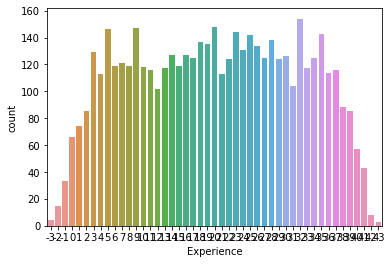

In [13]:
sns.countplot(df_bankloan_new['Experience'])# negative values in experience

In [19]:
#df_bankloan_new.info()

In [14]:
 # number of negative values in the "Experience" column
df_bankloan_new[df_bankloan_new['Experience']<0].count()

Age                   52
Experience            52
Income                52
ZIP Code              52
Family                52
CCAvg                 52
Education             52
Mortgage              52
Securities Account    52
CD Account            52
Online                52
CreditCard            52
Personal Loan         52
dtype: int64

In [15]:
#Removing negative values in the dataset
'''exp_median = df.loc[:,"Experience"].median()
#df['data'].apply(lambda x: 'true' if x <= 2.5 else 'false')
#df['col_3'] = df.apply(lambda x: f(x.col_1, x.col_2), axis=1)
#df_bankloan_new['Experience'].apply(lambda x : df_bankloan_new['Experience'].median() if (x<0))
exp_median = df.loc[:,"Experience"].median()
df_bankloan_new.loc[:, 'Experience'].replace([-1, -2, -3], [exp_median, exp_median, exp_median], inplace=True)'''

#Considering their ages I am assuming that this would be
#a mistake in data collection and I am taking absolute value of the "experience" column 
df_bankloan_new['Experience']=np.abs(df_bankloan_new['Experience'])

In [16]:
df_bankloan_new[df_bankloan_new['Experience']<0].count()

Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
Personal Loan         0
dtype: int64

# Univariate Analysis (Quantitative variables)

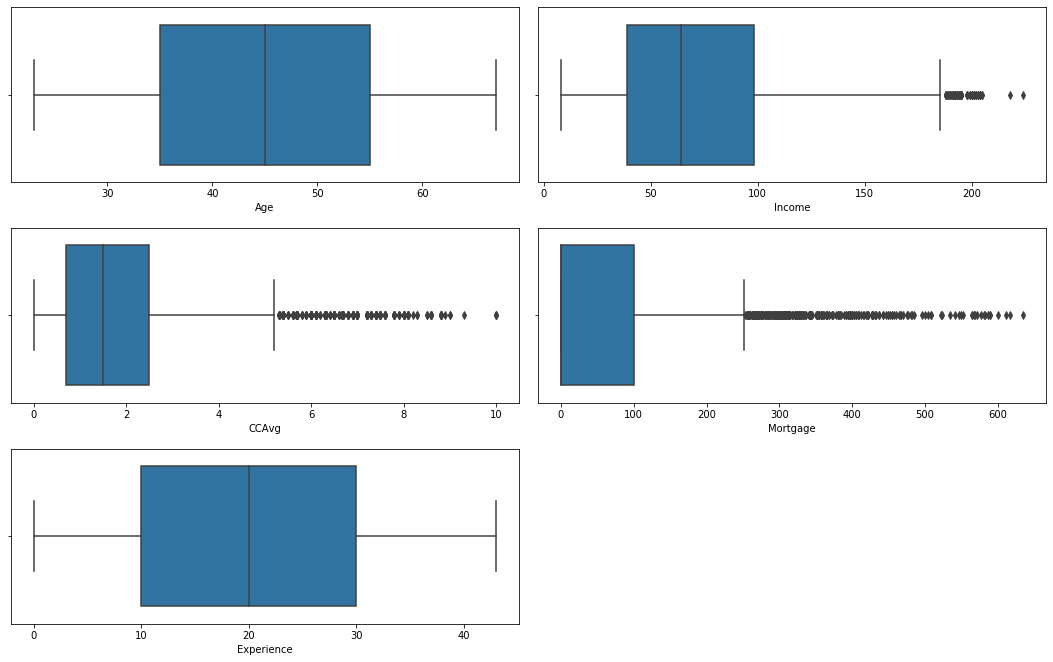

In [17]:
# Detetcting outliers
plt.figure(figsize=(15,15))
j=1
for i in ['Age','Income','CCAvg','Mortgage','Experience']:
    plt.subplot(5,2,j)
    plt.tight_layout()
    sns.boxplot(df_bankloan_new[i])
    j=j+1

CCAvg,Income,Mortgage has outliers

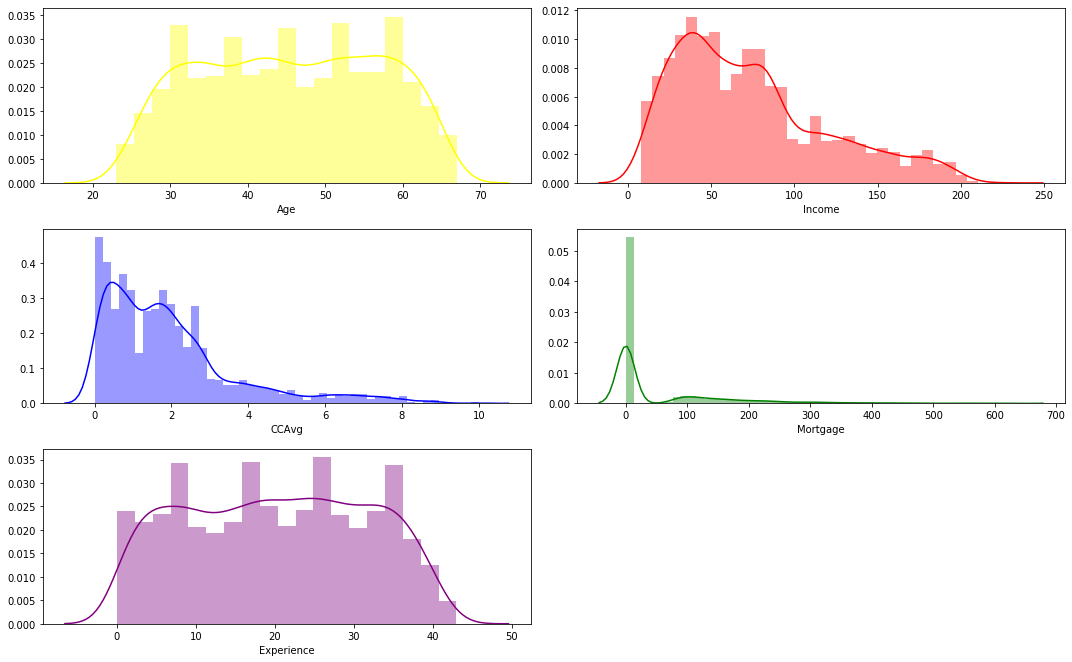

In [19]:
#2, Plotting all the continuous variables
plt.figure(figsize= (15,15))
x=['Age','Income','CCAvg','Mortgage','Experience']
c=['yellow','red','blue','green','purple']
k=1
for i,j in  zip(x,c):
    plt.subplot(5,2,k)
    plt.tight_layout()
    sns.distplot(df_bankloan_new[i], color=j)
    k=k+1

1. Age and Experience are not skewed and has almost normal distribution.

2. CCAvg,Income and Mortgage are highly skewed to the right.

In [20]:
#checking skewness in data
#For a unimodal distribution, negative skew commonly indicates that the tail is on the left side of the distribution, 
#and positive skew indicates that the tail is on the right
df_bankloan_new[['Age','Income','CCAvg','Mortgage','Experience']].skew(axis = 0, skipna = True) 

Age          -0.029341
Income        0.841339
CCAvg         1.598443
Mortgage      2.104002
Experience   -0.010038
dtype: float64

From the skewness values:-
1. Age and Experience are least skewed

2. CCAvg,Income and Mortgage are skewed.

# Bivariate Analysis (Quantitative variables with Personal Loan)

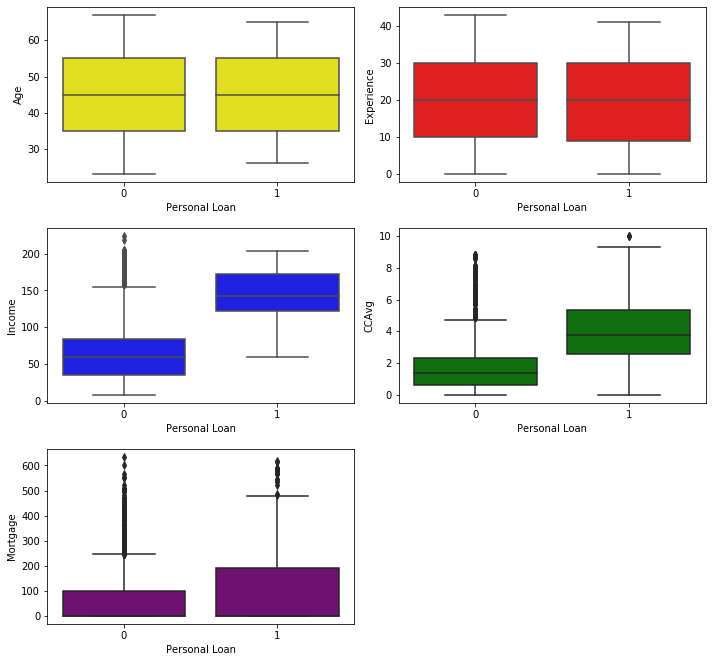

In [21]:
# boxplots of all continuous variables
plt.figure(figsize= (10,15))
x=['Age','Experience' ,'Income', 'CCAvg', 'Mortgage']
c=['yellow','red','blue','green','purple']
k=1
for i,j in  zip(x,c):
    plt.subplot(5,2,k)
    plt.tight_layout()
    sns.boxplot(x=df_bankloan_new["Personal Loan"],y=df_bankloan_new[i],color=j)
    k=k+1
plt.show()
#df_bankloan_new.boxplot('Age','Personal Loan',rot = 30,figsize=(5,6))

1. Distribution of Age and Experience of people with loan and without loan are roughly same,
   (35-56) and (10-30) .
2. Distribution of Income and Credit card average of people with loan is higher than that of people without loan
   For people with loan, Income is (100k - 200k) and CCAvg  is (2.2k - 5.5k) in dollars
3. There is an overlap in the distribution of mortgage of people with loan and without loan.
   People with loan has  a distribution of (0-200k).
   So we can infer that people with higher income and CCAvg might avail personal Loan. 

# Univariate Analysis (Quanlitative variables)

In [ ]:
#Distribution of categorical variables

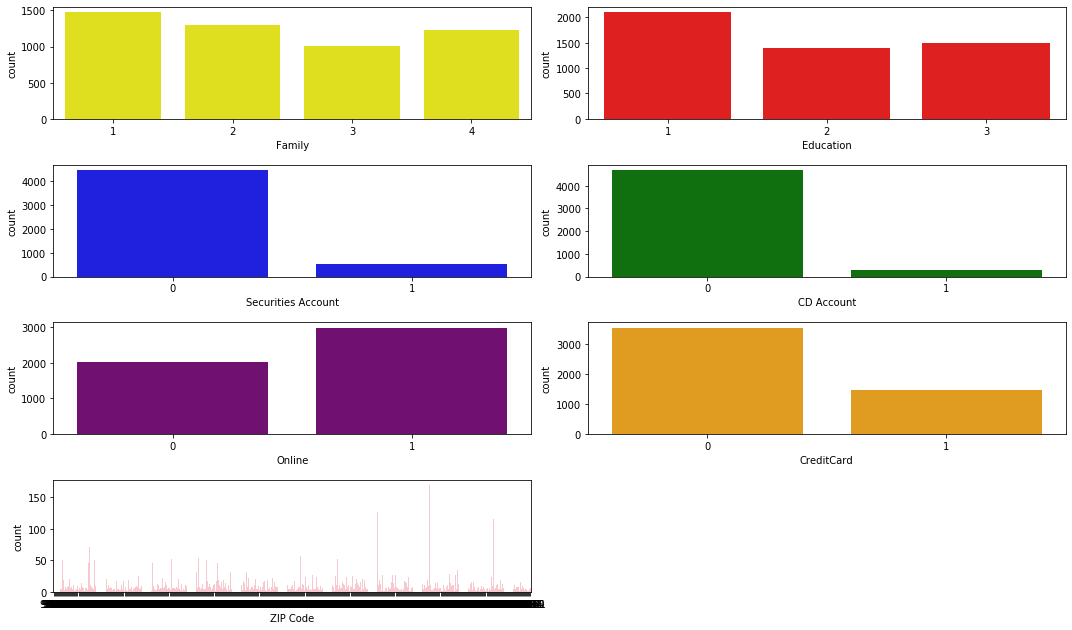

In [22]:
plt.figure(figsize= (15,15))
x=["Family","Education","Securities Account","CD Account","Online","CreditCard","ZIP Code"]
c=['yellow','red','blue','green','purple','orange','pink']
k=1
for i,j in  zip(x,c):
    plt.subplot(7,2,k)
    plt.tight_layout()
    sns.countplot(x=df_bankloan_new[i],color=j)
    k=k+1



In the given population people with the count of people without Securities Account, CD Account and Credit card 
is significantly more. 
But, majority of the people are utilising internet banking facility.
Also, it is interesting to note that most of the people are undergraduates in this population.


<Figure size 1080x1080 with 0 Axes>

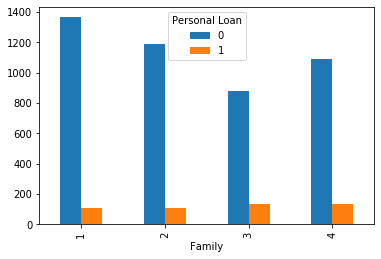

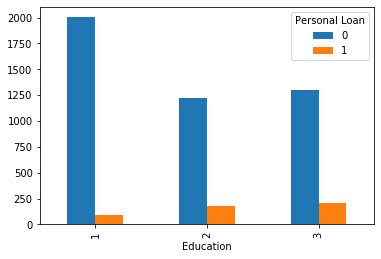

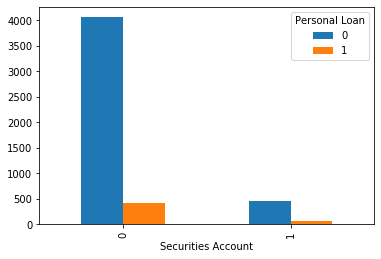

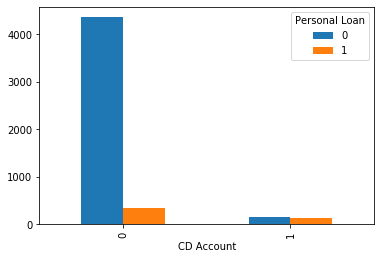

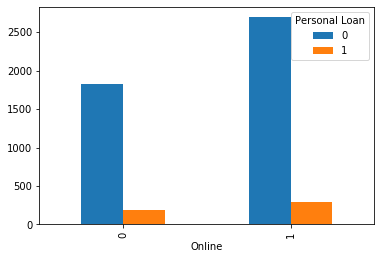

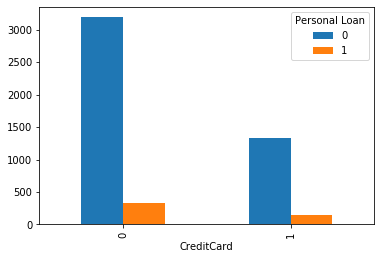

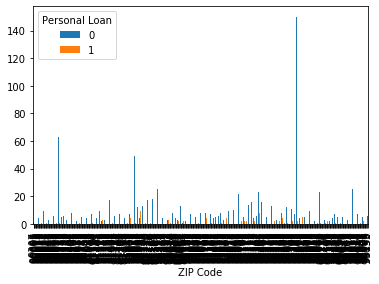

In [23]:
# plotting all the categorical attributes against personal loan
j=1
plt.figure(figsize= (15,15))
for i in ["Family","Education","Securities Account","CD Account","Online","CreditCard","ZIP Code"]:
    crosstab = pd.crosstab(df_bankloan_new[i],df_bankloan_new['Personal Loan'])
    #plt.subplot(3,3,j)
    #j=j+1
    crosstab.plot(kind="bar")
    plt.show()

1. Regardless of the family size a small percentage of people have opted to avail personal Loan and the percentage of
   people have opted to avail personal Loan is almost same across all the family sizes.
2. Comparitively, more no. of people in Education level 2 and 3 has opted for a loan
3. More no. of people with out a securities account has opted for loan compared to those with a securities account
4. Almost all the poeple with CD account has a loan also.



In [24]:
print(df_bankloan_new['Family'].value_counts(dropna=False))

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64


# Bivariate plots for further analysis

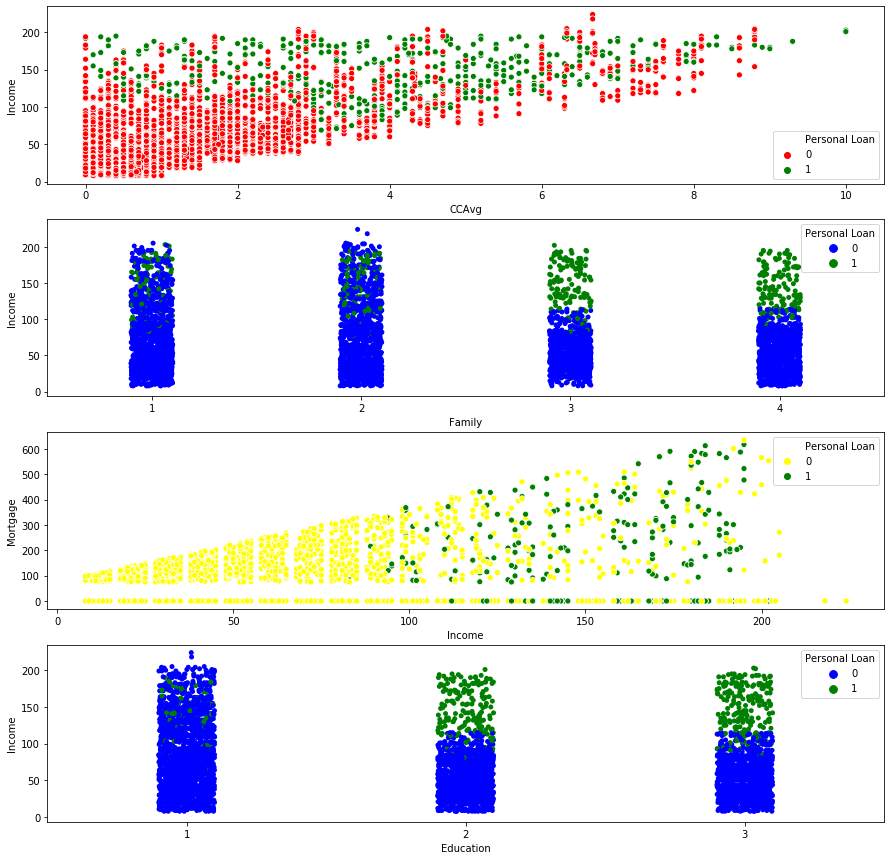

In [25]:
plt.figure(figsize=(15,15))

plt.subplot(4,1,1)
sns.scatterplot(df_bankloan_new['CCAvg'], df_bankloan_new['Income'], hue = df_bankloan_new['Personal Loan'], palette= ['red','green'])

plt.subplot(4,1,2)
sns.stripplot(df_bankloan_new['Family'], df_bankloan_new['Income'], hue = df_bankloan_new['Personal Loan'], palette= ['blue','green'])

plt.subplot(4,1,3)
sns.scatterplot(df_bankloan_new['Income'], df_bankloan_new['Mortgage'], hue = df_bankloan_new['Personal Loan'], palette= ['yellow','green'])

plt.subplot(4,1,4)
sns.stripplot(df_bankloan_new['Education'], df_bankloan_new['Income'], hue = df_bankloan_new['Personal Loan'], palette= ['blue','green'])


1. There is a slight positive correlation between CCAvg and Income. We can check this using corr.
2. There is also a positive correlation between Mortgage and Income. 
3. Income is more for Family size 2 compared to the others
4. People with higher income level and Mortgage is opting for loan.
5. Undergraduate people are the most salaried people


In [ ]:
#Boxplots

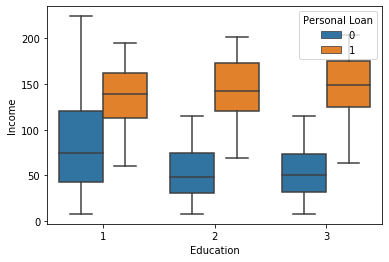

In [145]:
sns.boxplot(y=df_bankloan_new["Income"],x=df_bankloan_new["Education"],hue=df_bankloan_new["Personal Loan"])


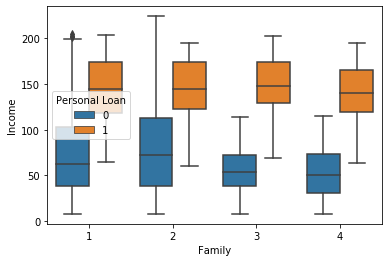

In [146]:
sns.boxplot(y=df_bankloan_new["Income"],x=df_bankloan_new["Family"],hue=df_bankloan_new["Personal Loan"])

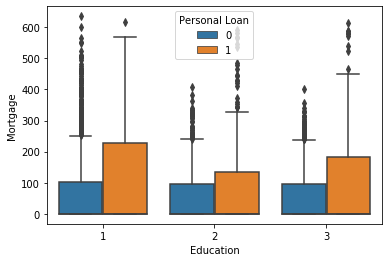

In [147]:
sns.boxplot(y=df_bankloan_new["Mortgage"],x=df_bankloan_new["Education"],hue=df_bankloan_new["Personal Loan"])

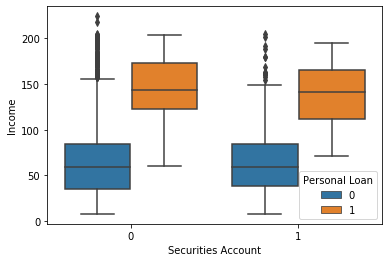

In [148]:
sns.boxplot(y=df_bankloan_new["Income"],x=df_bankloan_new["Securities Account"],hue=df_bankloan_new["Personal Loan"])

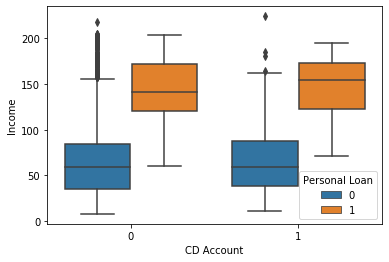

In [149]:
sns.boxplot(y=df_bankloan_new["Income"],x=df_bankloan_new["CD Account"],hue=df_bankloan_new["Personal Loan"])

1.From all the above box plots we can conclude that people with higher income range are opting for Personal Loan

In [112]:
#Pair plot

In [26]:
# coverting the datatype of qualitative attributes into "category"
df_bank_dtype = df_bankloan_new.copy()
for i in ["Family","Education","Personal Loan","Securities Account","CD Account","Online","CreditCard",]:
    df_bank_dtype[i]=df_bank_dtype[i].astype("category")
    

In [27]:
df_bank_dtype["ZIP Code"]=df_bank_dtype["ZIP Code"].astype("str")

In [28]:
df_bankloan_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
Personal Loan         5000 non-null int64
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


In [29]:
df_bank_dtype.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null object
Family                5000 non-null category
CCAvg                 5000 non-null float64
Education             5000 non-null category
Mortgage              5000 non-null int64
Securities Account    5000 non-null category
CD Account            5000 non-null category
Online                5000 non-null category
CreditCard            5000 non-null category
Personal Loan         5000 non-null category
dtypes: category(7), float64(1), int64(4), object(1)
memory usage: 269.4+ KB


In [30]:
df_encoded = df_bank_dtype.copy()
df_encoded.loc[:,['Education', 'Family', 'Online','Securities Account','CD Account','CreditCard']] = df_encoded.loc[:,['Education', 'Family', 'Online','Securities Account','CD Account','CreditCard']].apply(LabelEncoder().fit_transform)

/Users/lek/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/lek/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/lek/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/lek/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


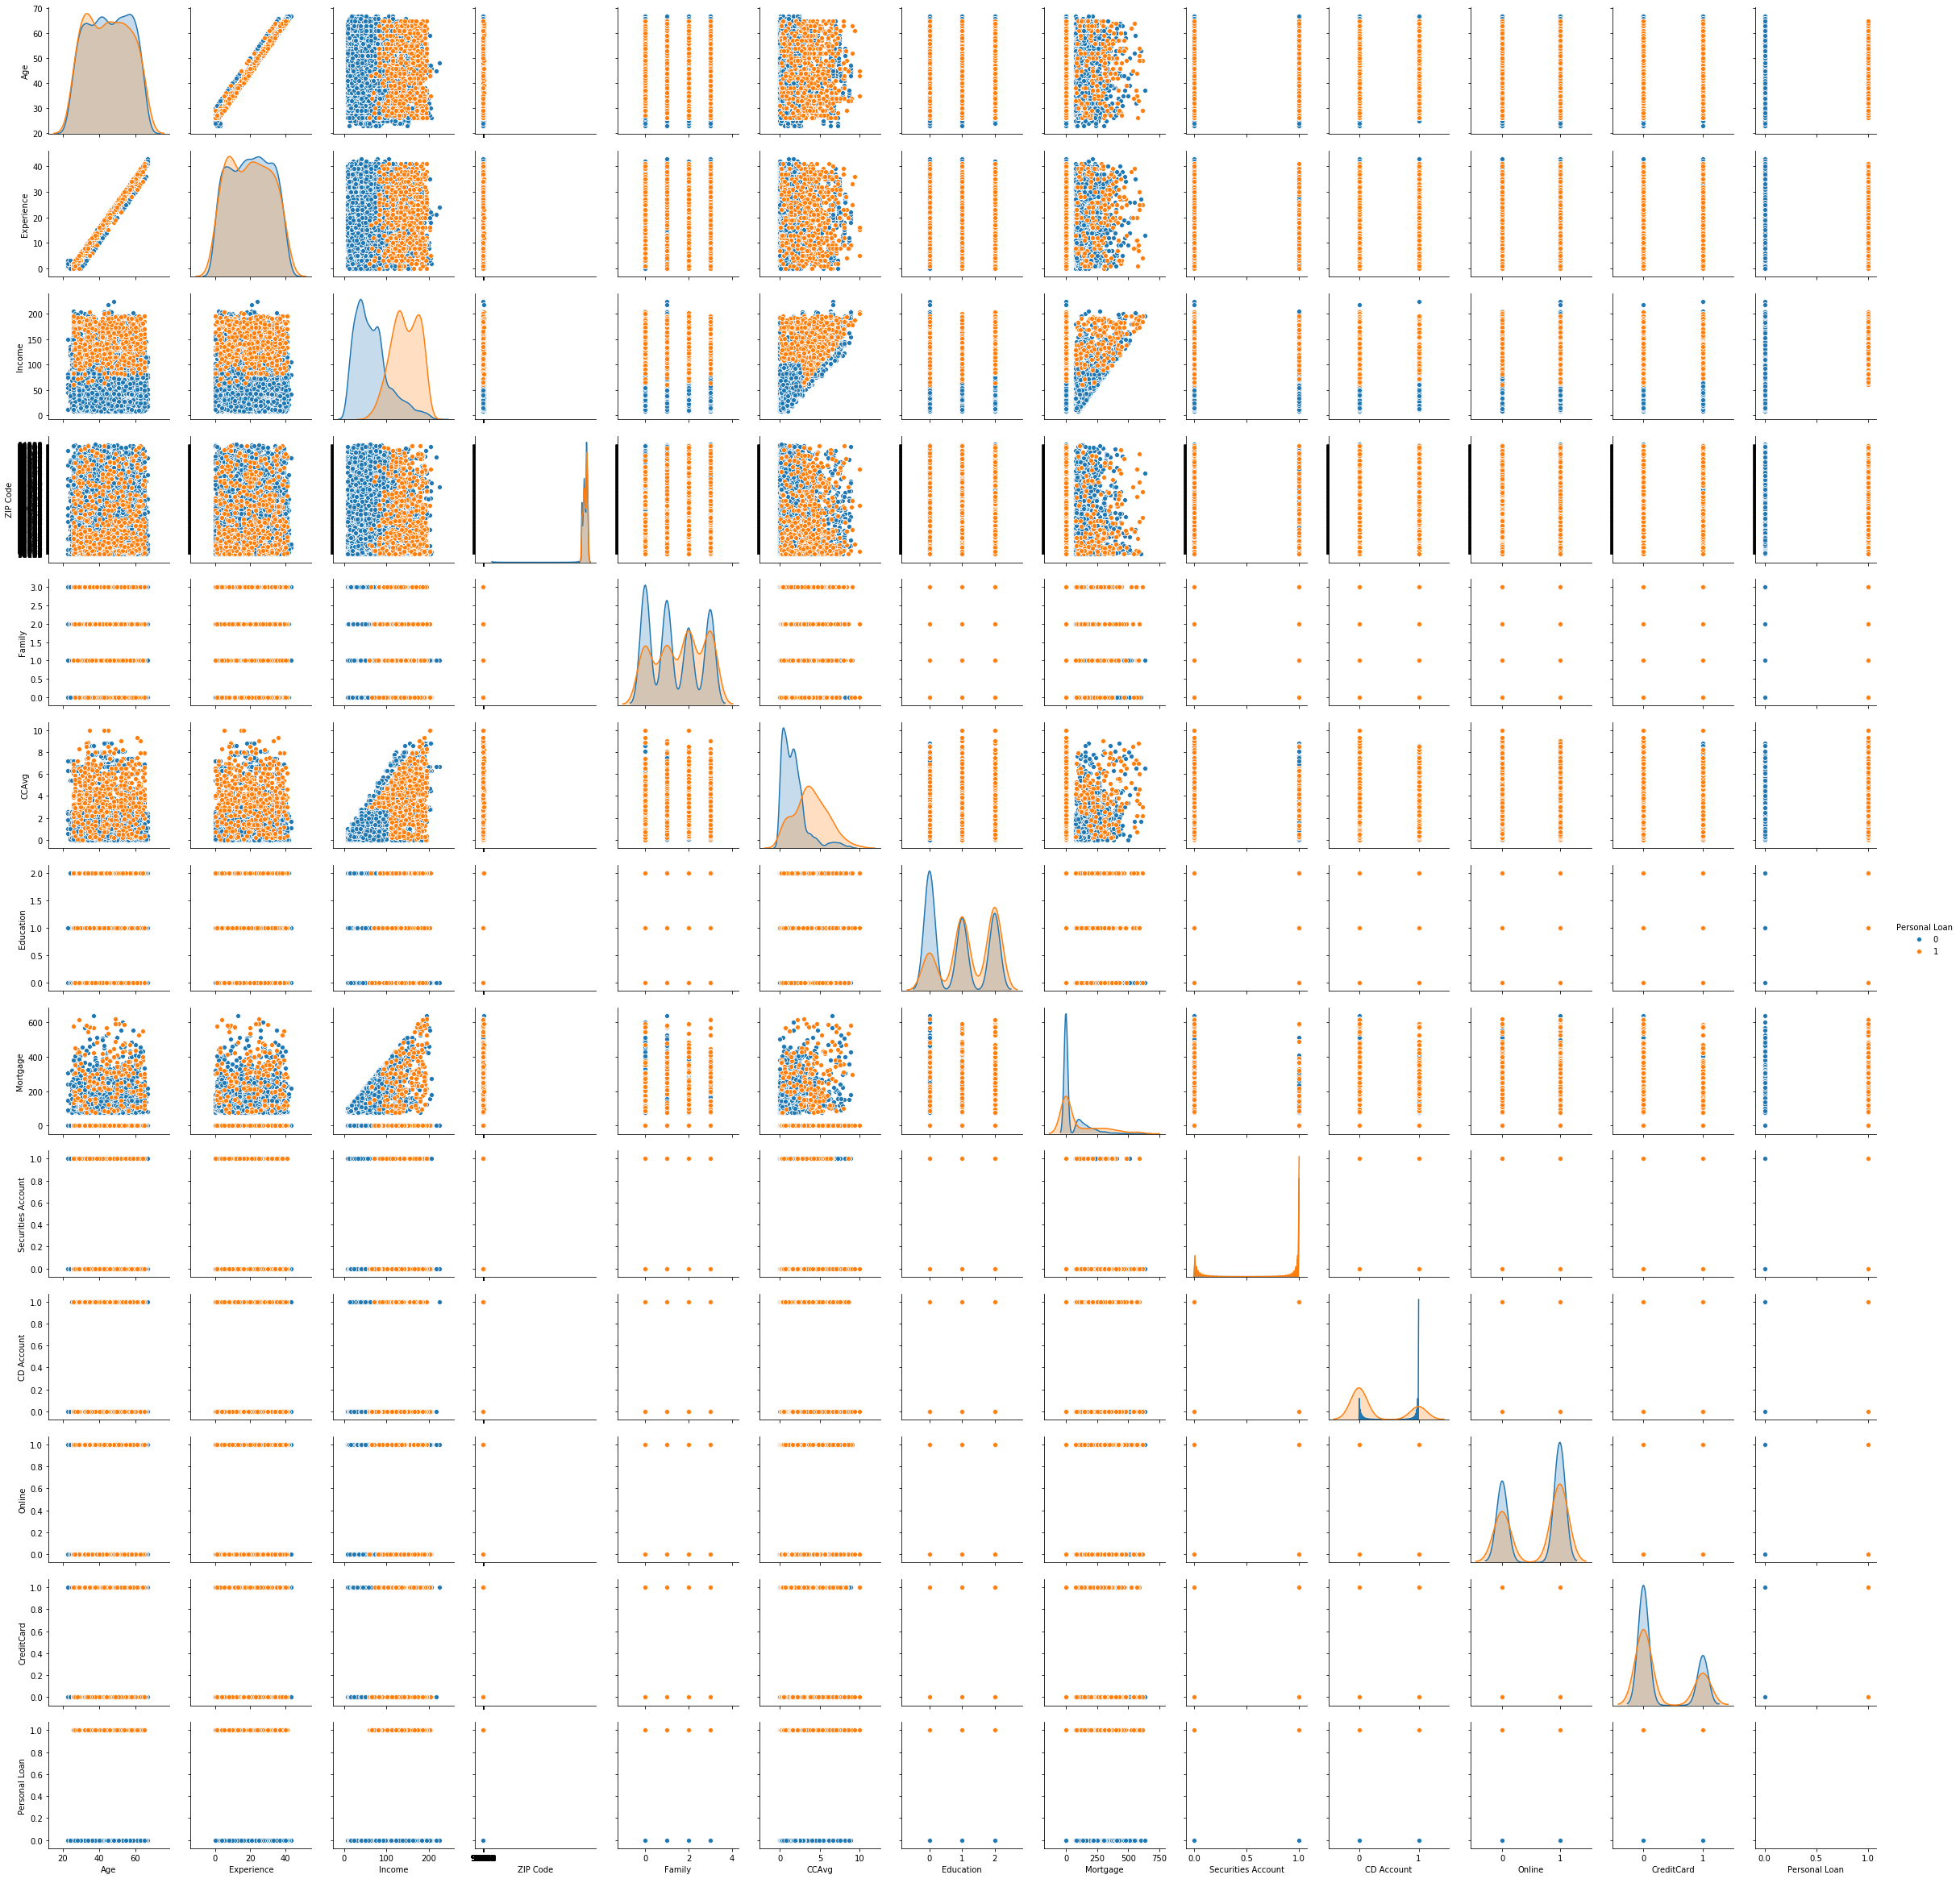

In [155]:
sns.pairplot(df_encoded,hue="Personal Loan")

/Users/lek/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Distribution of Income for taking Personal Loan')

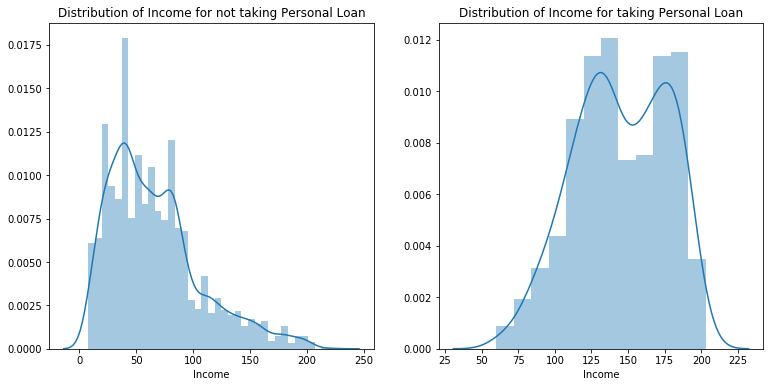

In [31]:
# Distribution of Income
fig = plt.figure(figsize = (12.8, 6))

ax = fig.add_subplot(121)
sns.distplot(df_bankloan_new[(df_bankloan_new['Personal Loan'] == 0)]['Income'], 
             ax = ax).set_title('Distribution of Income for not taking Personal Loan')

ax= fig.add_subplot(122)
sns.distplot(df_bankloan_new[(df_bankloan_new['Personal Loan'] == 1)]['Income'],  
             ax = ax).set_title('Distribution of Income for taking Personal Loan')

From the above plots we can deduce the following:-
1. There is a strong postive relation between age and Experience
2. There is a slight positive correlation between CCAvg and Income. We can check this using corr.
3. There is also a positive correlation between Mortgage and Income. 
4. From the income distplot we can conclude people with higher income level are taking personal loans.



In [32]:
df_encoded.columns

Index(['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Securities Account', 'CD Account', 'Online',
       'CreditCard', 'Personal Loan'],
      dtype='object')

In [37]:
# more analysis on ZIP Code
df_bankloan_zip=df_bankloan_new.copy()
df_bankloan_zip.info()
df_bankloan_zip.groupby("ZIP Code").count()
df_bankloan_zip['ZIP Code']=df_bankloan_new["ZIP Code"].astype('str')
#df_bankloan_zip.groupby(df_bankloan_new["ZIP Code"][0][0:2])
df_bankloan_zip["ZIP Code"].str[0:2].nunique()
#df_bank_dtype.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
Personal Loan         5000 non-null int64
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


7

Text(0, 0.5, 'No. of personal loans')

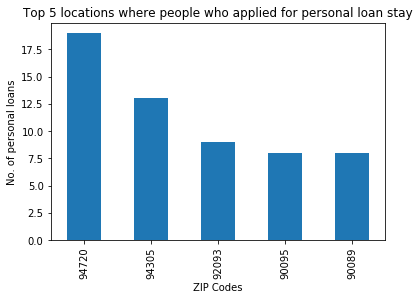

In [38]:
#Top 5 ZIP codes where people with personal Loans reside
ax=df_bankloan_new[df_bankloan_new['Personal Loan']==1]['ZIP Code'].value_counts().head().plot(kind='bar',title="Top 5 locations where people who applied for personal loan stay")
ax.set_xlabel("ZIP Codes")
ax.set_ylabel("No. of personal loans")

Most no. of people residing in area with ZIP code 94720 has taken personal loan

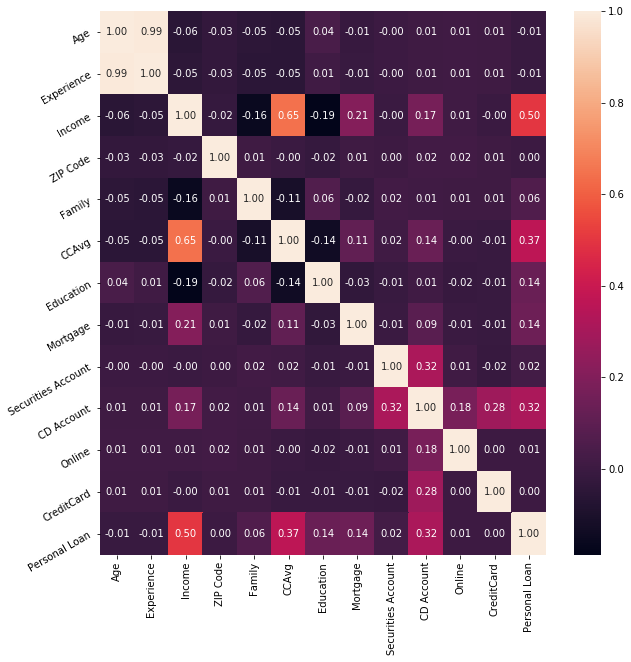

In [39]:
# To check the correlation coefficient between variables
corr=df_bankloan_new.corr()
#print(corr)
plt.figure(figsize=(10,10))
a = sns.heatmap(corr, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

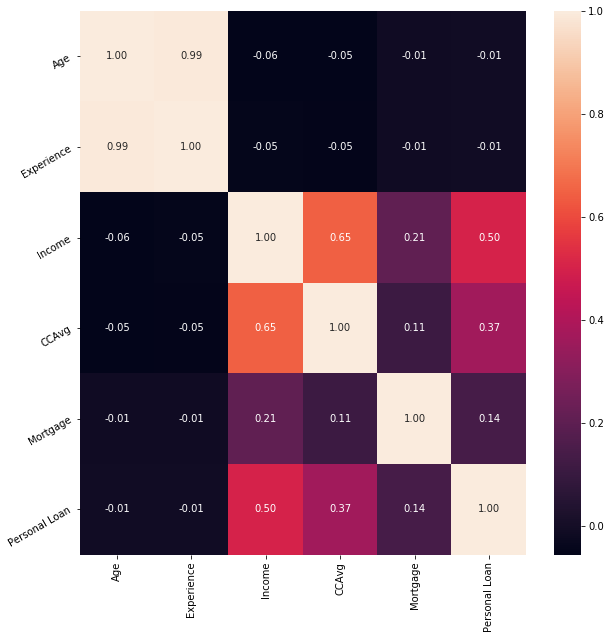

In [40]:
corr=df_bankloan_new[['Age','Experience','Income','CCAvg','Mortgage','Personal Loan']].corr()
#print(corr)
plt.figure(figsize=(10,10))
a = sns.heatmap(corr, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

In [41]:
# Filter for correlation value greater than 0.5
sort = corr.abs().unstack()
sort = sort.sort_values(kind = "quicksort", ascending = False)
sort[(sort > 0.5) & (sort < 1)]

Age            Experience       0.993991
Experience     Age              0.993991
CCAvg          Income           0.645984
Income         CCAvg            0.645984
Personal Loan  Income           0.502462
Income         Personal Loan    0.502462
dtype: float64

Index(['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Securities Account', 'CD Account', 'Online',
       'CreditCard'],
      dtype='object')

1. Age and Experience has a very high correlation. So to avoid multicollinearity, wehave to avoid one out of these 2
2. Income and CCAvg are moderately correlated.


In [44]:
# Absolute correlation of independent variables with 'Personal Loan' i.e. the target variable
absCorrwithDep = []
allVars = df_bankloan_new.drop('Personal Loan', axis = 1).columns

for var in allVars:
    absCorrwithDep.append(abs(df_bankloan_new['Personal Loan'].corr(df_bankloan_new[var])))

display(pd.DataFrame([allVars, absCorrwithDep], index = ['Variable', 'Correlation']).T.\
        sort_values('Correlation', ascending = False))

,Variable,Correlation
2,Income,0.502462
5,CCAvg,0.366889
9,CD Account,0.316355
7,Mortgage,0.142095
6,Education,0.136722
4,Family,0.061367
8,Securities Account,0.0219539
1,Experience,0.00830387
0,Age,0.00772562
10,Online,0.00627782


From the values, 
1. We can choose to keep Experience as the correlation between Experience and Personal Loan is more compared to that with age
2. ZIP Code can be dropped.

In [47]:
# Since Age and Experience are highly correlated we can drop Experience from the data set

df_bankloan_new=df_bankloan_new.drop(['Age'],axis=1)
df_bankloan_new=df_bankloan_new.drop(['ZIP Code'],axis=1)
#df_a=df_bankloan_new.drop(['Experience'],inplace=True,axis=1)
#df_b=df_bankloan_new.drop(['ZIP Code'],inplace=True,axis=1)

In [48]:
df_bankloan_new.columns

Index(['Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Securities Account', 'CD Account', 'Online', 'CreditCard',
       'Personal Loan'],
      dtype='object')

In [114]:
#3 
#Get the target column distribution.


# Distribution of target column: "Personal Loan"

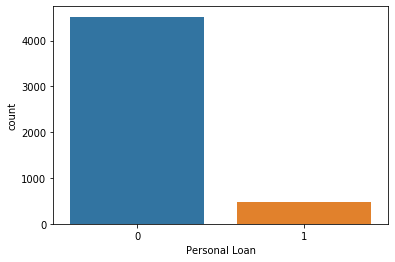

In [49]:
sns.countplot(df_bankloan_new["Personal Loan"])#

In [50]:
df_bankloan_new['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [51]:
# checking whether there is any imbalance in the data
print(" Percentage of people who do not have a loan is ",(100*(df_bankloan_new['Personal Loan'].value_counts()[0]/len(df_bankloan_new))))
print(" Percentage of people who have a loan is ",(100*(df_bankloan_new['Personal Loan'].value_counts()[1]/len(df_bankloan_new))))

 Percentage of people who do not have a loan is  90.4
 Percentage of people who have a loan is  9.6


1. The data is highly imbalanced. 
2. Ratio of the people with a loan to those without a loan is 10:90
3. SMOTE technique should be applied on the dataset to balance the data. 

In [52]:
#Splitting the dataset into predictor variables and target variable
df1=df_bankloan_new.copy()
#df_2=df_bank_dtype.copy()
#df2=df_2.drop(['Experience'],axis=1)
X=df1.drop(['Personal Loan'],axis=1)#predictors
y=df1['Personal Loan']#Target

In [53]:
# import SMOTE module from imblearn library 
# pip install imblearn 

from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_sm, y_sm = sm.fit_sample(X, y.ravel()) 
  

In [54]:
#4 
#Split the data into training and test set in the ratio of 70:30 respectively

In [55]:
#4 Split the data into training and test set in the ratio of 70:30 respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm, test_size = 0.3, random_state = 42)

In [56]:
print('After OverSampling, the shape of X: {}'.format(X.shape)) 
print('After OverSampling, the shape of y: {} \n'.format(y.shape))
print("Before OverSampling, counts of label '1' in training set: {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0' in training set: {} \n".format(sum(y_train == 0))) 
print("Before OverSampling, counts of label '1' : {}".format(sum(y == 1))) 
print("Before OverSampling, counts of label '0' : {} \n".format(sum(y == 0)))

print('****'*10)
print("After applying SMOTE technique to get balanced data")
print('****'*10)  

print('After OverSampling, the shape of X: {}'.format(X_sm.shape)) 
print('After OverSampling, the shape of y: {} \n'.format(y_sm.shape)) 
print("Before OverSampling, counts of label '1' in training set: {}".format(sum(y_train_sm == 1))) 
print("Before OverSampling, counts of label '0' in training set: {} \n".format(sum(y_train_sm == 0)))   
print("After OverSampling, counts of label '1' : {}".format(sum(y_sm== 1))) 
print("After OverSampling, counts of label '0' : {}".format(sum(y_sm == 0))) 



After OverSampling, the shape of X: (5000, 10)
After OverSampling, the shape of y: (5000,) 

Before OverSampling, counts of label '1' in training set: 323
Before OverSampling, counts of label '0' in training set: 3177 

Before OverSampling, counts of label '1' : 480
Before OverSampling, counts of label '0' : 4520 

****************************************
After applying SMOTE technique to get balanced data
****************************************
After OverSampling, the shape of X: (9040, 10)
After OverSampling, the shape of y: (9040,) 

Before OverSampling, counts of label '1' in training set: 3191
Before OverSampling, counts of label '0' in training set: 3137 

After OverSampling, counts of label '1' : 4520
After OverSampling, counts of label '0' : 4520


In [57]:
# 5,6
#Use different classification models(Logistic,K-NN&Naïve Bayes)to predict the likelihood of a customer buying personal loans
#Print the confusion matrix for all the above models 


In [58]:
#Logistic Regression with out over sampling
Scores_modeldict={}
print('****'*10)
print("Logistic Regression with imbalanced data:")
print('****'*10)

LogReg=LogisticRegression()
LogReg.fit(X_train,y_train)
predict_LogReg=LogReg.predict(X_test)

# print classification report 
print(classification_report(y_test, predict_LogReg))

print("Score-Training Dataset - ",LogReg.score(X_train,y_train))
print("Score-Testing Dataset - ",LogReg.score(X_test,y_test))

#print Confusion matrix and Accuracy Score
results = confusion_matrix(y_test,predict_LogReg) 
print ('Confusion Matrix :')

print(results) 
print('\n')
print ('Accuracy Score :',accuracy_score(y_test,predict_LogReg ))
print('\n')
Scores_modeldict["LR"]=accuracy_score(y_test,predict_LogReg )
#Logistic Regression after over sampling
print('****'*10)
print("Logistic Regression after over sampling:")
print('****'*10)

LogReg.fit(X_train_sm, y_train_sm.ravel()) 
predict_LogReg_sm = LogReg.predict(X_test_sm) 
  
# print classification report 
print(classification_report(y_test_sm, predict_LogReg_sm)) 

print("Score- Training Dataset  - ",LogReg.score(X_train_sm,y_train_sm))
print("Score- Testing Dataset - ",LogReg.score(X_test_sm,y_test_sm))

#print Confusion matrix and Accuracy Score
results = confusion_matrix(y_test_sm,predict_LogReg_sm) 
print ('Confusion Matrix :')

print(results) 
print('\n')
print ('Accuracy Score :',accuracy_score(y_test_sm,predict_LogReg_sm ))
print('\n')
Scores_modeldict["LR_sm"]=accuracy_score(y_test_sm,predict_LogReg_sm )



****************************************
Logistic Regression with imbalanced data:
****************************************
             precision    recall  f1-score   support

          0       0.95      0.99      0.97      1343
          1       0.87      0.58      0.69       157

avg / total       0.94      0.95      0.94      1500

Score-Training Dataset -  0.952
Score-Testing Dataset -  0.9466666666666667
Confusion Matrix :
[[1329   14]
 [  66   91]]


Accuracy Score : 0.9466666666666667


****************************************
Logistic Regression after over sampling:
****************************************
             precision    recall  f1-score   support

          0       0.92      0.90      0.91      1383
          1       0.90      0.92      0.91      1329

avg / total       0.91      0.91      0.91      2712

Score- Training Dataset  -  0.9040771175726928
Score- Testing Dataset -  0.9096607669616519
Confusion Matrix :
[[1243  140]
 [ 105 1224]]


Accuracy Score : 0.90

In [59]:
#K-NN with out over sampling

print('****'*10)
print("K-NN with imbalanced data:")
print('****'*10)

KNN=KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train,y_train)
predict_KNN=KNN.predict(X_test)

# print classification report 
print(classification_report(y_test, predict_KNN))
print("Score-Training Dataset - ",KNN.score(X_train,y_train))
print("Score-Testing Dataset - ",KNN.score(X_test,y_test))
print('\n')
#print Confusion matrix and Accuracy Score
results = confusion_matrix(y_test,predict_KNN) 
print ('Confusion Matrix :')

print(results) 
print('\n')
print ('Accuracy Score :',accuracy_score(y_test,predict_KNN ))
print('\n')

#KNN after applying SMOTE
print('****'*10)
print("K-NN after over sampling:")
print('****'*10)

KNN.fit(X_train_sm, y_train_sm.ravel()) 
predict_KNN_sm = KNN.predict(X_test_sm) 
  
# print classification report 
print(classification_report(y_test_sm, predict_KNN_sm)) 

print("Score- Training Dataset  - ",KNN.score(X_train_sm,y_train_sm))
print("Score- Testing Dataset - ",KNN.score(X_test_sm,y_test_sm))
print('\n')
#print Confusion matrix and Accuracy Score
results = confusion_matrix(y_test_sm,predict_KNN_sm) 
print ('Confusion Matrix :')

print(results) 
print('\n')
print ('Accuracy Score :',accuracy_score(y_test_sm,predict_KNN_sm ))
print('\n')

Scores_modeldict["KNN"]=accuracy_score(y_test,predict_KNN )
Scores_modeldict["KNN_sm"]=accuracy_score(y_test_sm,predict_KNN_sm )


****************************************
K-NN with imbalanced data:
****************************************
             precision    recall  f1-score   support

          0       0.93      0.96      0.95      1343
          1       0.55      0.41      0.47       157

avg / total       0.89      0.90      0.90      1500

Score-Training Dataset -  0.9554285714285714
Score-Testing Dataset -  0.9033333333333333


Confusion Matrix :
[[1291   52]
 [  93   64]]


Accuracy Score : 0.9033333333333333


****************************************
K-NN after over sampling:
****************************************
             precision    recall  f1-score   support

          0       0.99      0.88      0.93      1383
          1       0.89      0.99      0.94      1329

avg / total       0.94      0.93      0.93      2712

Score- Training Dataset  -  0.9617572692793932
Score- Testing Dataset -  0.9328908554572272


Confusion Matrix :
[[1215  168]
 [  14 1315]]


Accuracy Score : 0.932890855457227

In [60]:
#NB with out over sampling

print('****'*10)
print("Naive Bayes with imbalanced data:")
print('****'*10)

gNB = GaussianNB()
gNB.fit(X_train,y_train)
predict_gNB=gNB.predict(X_test)

# print classification report 
print("CLASSIFICATION REPORT\n")
print(classification_report(y_test, predict_gNB))
print("Score-Training Dataset - ",gNB.score(X_train,y_train))
print("Score-Testing Dataset - ",gNB.score(X_test,y_test))
print('\n')

#print Confusion matrix and Accuracy Score
results = confusion_matrix(y_test,predict_gNB) 
print ('Confusion Matrix :')

print(results) 
print('\n')
print ('Accuracy Score :',accuracy_score(y_test,predict_gNB ))
print('\n')

#NB after applying SMOTE
print('****'*10)
print("Naive Bayes after over sampling:")
print('****'*10)

gNB.fit(X_train_sm, y_train_sm.ravel()) 
predict_gNB_sm = gNB.predict(X_test_sm) 
  
# print classification report

print("CLASSIFICATION REPORT\n")

print(classification_report(y_test_sm, predict_gNB_sm)) 

print("Score- Training Dataset  - ",gNB.score(X_train_sm,y_train_sm))
print("Score- Testing Dataset - ",gNB.score(X_test_sm,y_test_sm))
print('\n')
#print Confusion matrix and Accuracy Score
results = confusion_matrix(y_test_sm,predict_gNB_sm) 
print ('Confusion Matrix :')

print(results) 
print('\n')
print ('Accuracy Score :',accuracy_score(y_test_sm,predict_gNB_sm ))
print('\n')

Scores_modeldict["gNB"]=accuracy_score(y_test,predict_gNB )
Scores_modeldict["gNB_sm"]=accuracy_score(y_test_sm,predict_gNB_sm )


****************************************
Naive Bayes with imbalanced data:
****************************************
CLASSIFICATION REPORT

             precision    recall  f1-score   support

          0       0.95      0.93      0.94      1343
          1       0.49      0.60      0.54       157

avg / total       0.90      0.89      0.90      1500

Score-Training Dataset -  0.8822857142857143
Score-Testing Dataset -  0.892


Confusion Matrix :
[[1244   99]
 [  63   94]]


Accuracy Score : 0.892


****************************************
Naive Bayes after over sampling:
****************************************
CLASSIFICATION REPORT

             precision    recall  f1-score   support

          0       0.86      0.90      0.88      1383
          1       0.89      0.84      0.86      1329

avg / total       0.87      0.87      0.87      2712

Score- Training Dataset  -  0.8561946902654868
Score- Testing Dataset -  0.870575221238938


Confusion Matrix :
[[1240  143]
 [ 208 1121]]


A

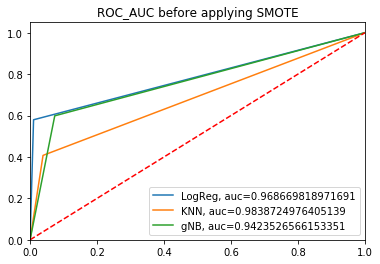

In [61]:
#AUC ROC curve before applying SMOTE
#from sklearn.metrics import roc_auc_score, roc_curve
from sklearn import metrics
plt.figure(0).clf()


fpr, tpr, thresh = metrics.roc_curve(y_test, predict_LogReg)
auc = metrics.roc_auc_score(y_test, LogReg.predict_proba(X_test)[::,1])
plt.plot(fpr,tpr,label="LogReg, auc="+str(auc))


fpr, tpr, thresh = metrics.roc_curve(y_test, predict_KNN)
auc = metrics.roc_auc_score(y_test, KNN.predict_proba(X_test)[::,1])
plt.plot(fpr,tpr,label="KNN, auc="+str(auc))

fpr, tpr, thresh = metrics.roc_curve(y_test, predict_gNB)
auc = metrics.roc_auc_score(y_test, gNB.predict_proba(X_test)[::,1])
plt.plot(fpr,tpr,label="gNB, auc="+str(auc))
plt.plot([0, 1], [0, 1],'r--')
plt.title("ROC_AUC before applying SMOTE")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.legend(loc=0)

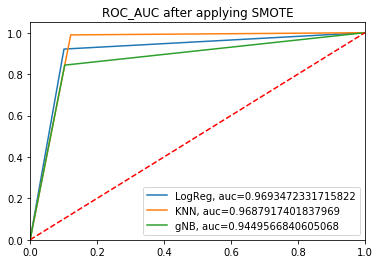

In [63]:
#AUC ROC curve after applying SMOTE
plt.figure(0).clf()


fpr, tpr, thresh = metrics.roc_curve(y_test_sm, predict_LogReg_sm)
auc = metrics.roc_auc_score(y_test_sm, LogReg.predict_proba(X_test_sm)[::,1])
plt.plot(fpr,tpr,label="LogReg, auc="+str(auc))


fpr, tpr, thresh = metrics.roc_curve(y_test_sm,predict_KNN_sm )
auc = metrics.roc_auc_score(y_test_sm, KNN.predict_proba(X_test_sm)[::,1])
plt.plot(fpr,tpr,label="KNN, auc="+str(auc))

fpr, tpr, thresh = metrics.roc_curve(y_test_sm, predict_gNB_sm)
auc = metrics.roc_auc_score(y_test_sm, gNB.predict_proba(X_test_sm)[::,1])
plt.plot(fpr,tpr,label="gNB, auc="+str(auc))
plt.plot([0, 1], [0, 1],'r--')
plt.title("ROC_AUC after applying SMOTE")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.legend(loc=0)

In [105]:
#7
#Give your reasoning on which is the best model in this case and why it performs better?

From the above matrices and the ROC-AUC curve, K-NN is the best model for the data set that we have. 

1. Precision tells you out of all the predicted values, what percentage is right
2. Recall tells you out of all the observations, what percentage did we identify rightly.In this dataset we should
   try to reduce false negatives. So Recall is important.
3. F1 score is the harmonic mean of recall and precision. So F1 score should also be given importance.
4. Recall value  and F1-score has improved significantly in predicting output("Personal Loan"=1) after applying 
   the SMOTE technique
5. Also, from the ROC-AUC the area is more for K-NN model than the other two (for both before and after applying    SMOTE)
   Logistic Regression is also performing well.
6. When comparing the Accuracy scores, K-NN has a score of 93.2% after applying SMOTE

Over all, the best performing model is K-NN 